# Predict Model from Soggetti



In [5]:
# import code

import intervals
from intervals import * 
from intervals import main_objs
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0008"  # <==  put your model number here!
mass_id = "0005" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list[5]

'https://crimproject.org/mei/CRIM_Mass_0005_5.mei'

In [1]:
# Or build a list by hand:
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei', 
              'https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']


### 1.1 Melodic Entries as Similarity Matrix

* Use the **modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces. 
* These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
thematic (i.e. recurring) melodies can be found as thematic melodies in all the other pieces in your corpus**. The
specific number of times they appear in the model is not considered, provided that it is
at least two.


### How to Read the Results:

* As you read across, you will see the percentage of melodies in the row value that come from the corresponding column value.  

In [4]:
corpus = CorpusBase(corpus_list)
similarity_matrix = corpus.modelFinder()
similarity_matrix 

Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_5.mei


Model,CRIM_Model_0008,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5
Mass,,,,,,
CRIM_Model_0008,1.000000,0.350877,0.649123,0.736842,0.315789,0.263158
CRIM_Mass_0005_1,0.717949,1.000000,0.743590,0.410256,0.615385,0.410256
CRIM_Mass_0005_2,0.660714,0.196429,1.000000,0.714286,0.285714,0.160714
CRIM_Mass_0005_3,0.592920,0.159292,0.513274,1.000000,0.309735,0.247788
CRIM_Mass_0005_4,0.205128,0.230769,0.358974,0.435897,1.000000,0.358974
CRIM_Mass_0005_5,0.409091,0.318182,0.318182,0.590909,0.636364,1.000000


###  1.2 The Melodic Matrix as Heatmap


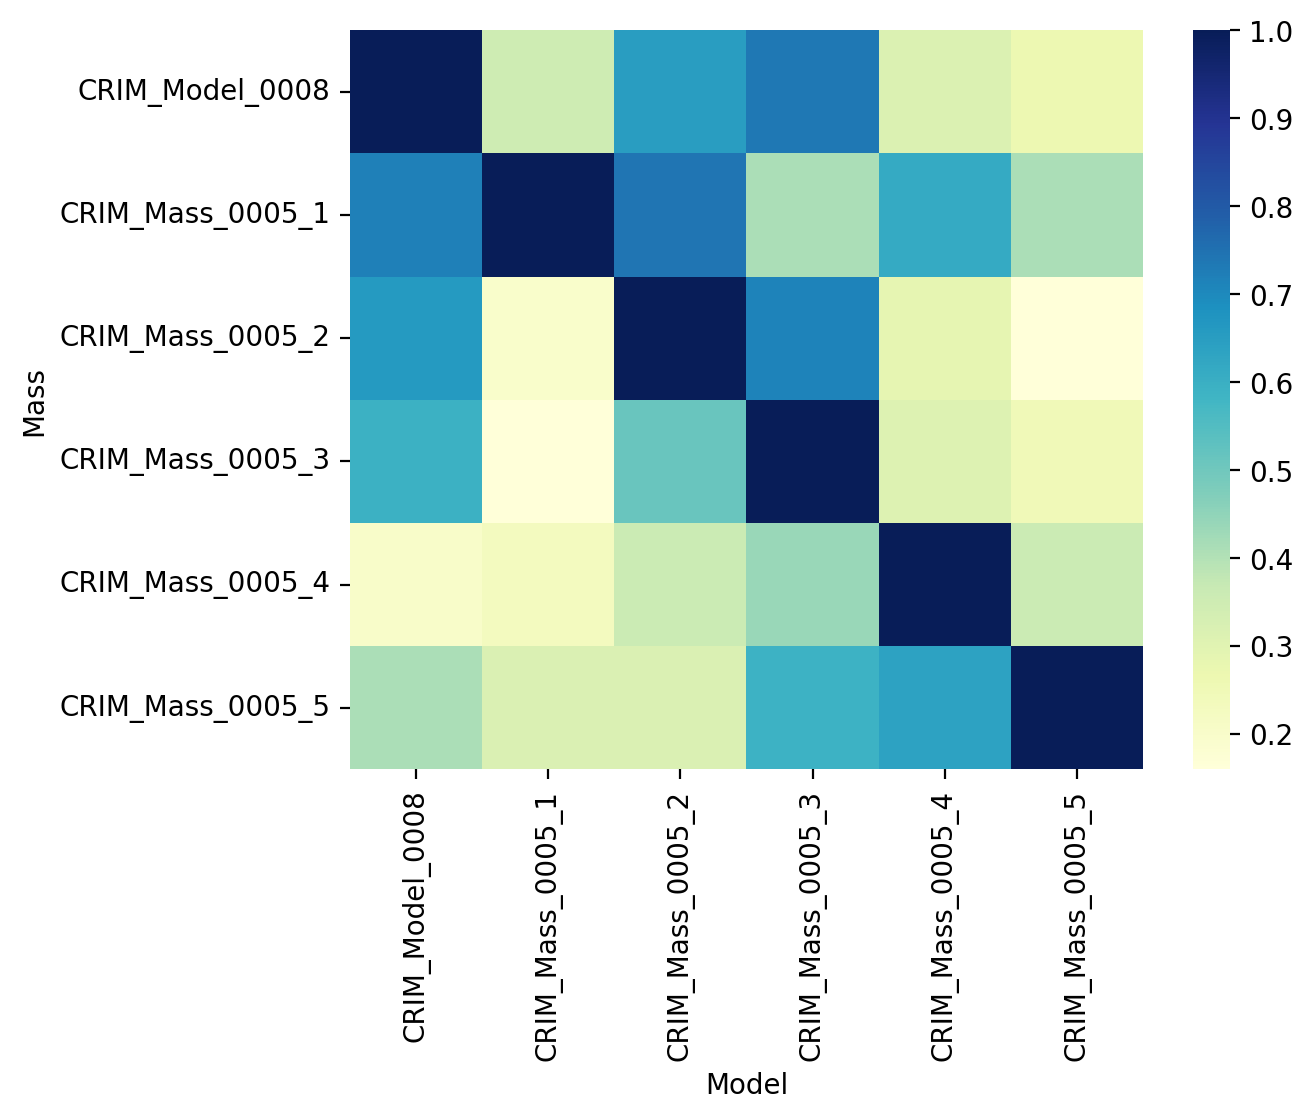

In [6]:
# melodic matrix
dataplot = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.show()

### 1.3 Models and Masses as distinct sets 

Making separate model and mass lists makes things a bit neater, since don't compare pieces to themselves

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot
```

In [11]:
model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
         'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']             

In [13]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot

Successfully imported https://crimproject.org/mei/CRIM_Model_0010.mei
Successfully imported https://crimproject.org/mei/CRIM_Model_0011.mei
Successfully imported https://crimproject.org/mei/CRIM_Model_0014.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0008_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0008_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0008_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0008_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0008_5.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0009_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0009_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0009_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0009_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0009_5.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0012_1.mei
Successfu

Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.696970,0.000000,0.545455
CRIM_Mass_0008_2,0.637931,0.034483,0.086207
CRIM_Mass_0008_3,0.340659,0.054945,0.186813
CRIM_Mass_0008_4,0.488372,0.000000,0.255814
CRIM_Mass_0008_5,0.414286,0.057143,0.214286
CRIM_Mass_0009_1,0.370370,0.222222,0.222222
CRIM_Mass_0009_2,0.372093,0.325581,0.046512
CRIM_Mass_0009_3,0.360000,0.293333,0.160000
CRIM_Mass_0009_4,0.478261,0.304348,0.086957


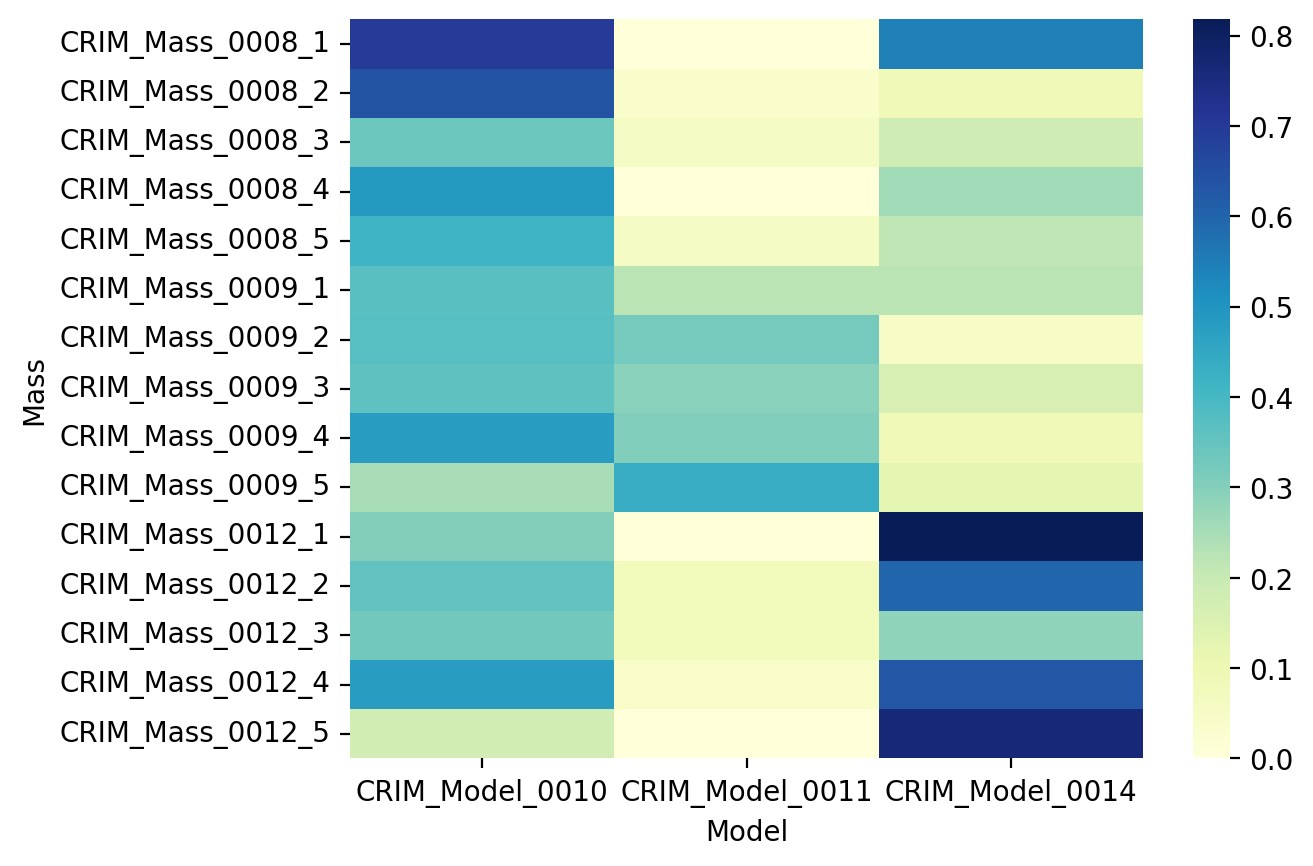

In [14]:
# melodic matrix
dataplot = sns.heatmap(cross_plot, cmap="YlGnBu", annot=False)
plt.show()


### 1.4 Contrapuntal (Modular) Ngrams as Similarity Matrix

* **Contrapuntal Modules** are 'ngrams' that represent the motion of a pair of voices.  The tool finds the patterns between every pair of voices, then filters these to correspond to the moments of the 'entries'.  So it tells us not only that there are shared melodies, but what is happening to the melodies in their contrapuntal context.
* `moduleFinder`  method identifies all of the `modular ngrams` in each piece that **coincide with the melodic entries**.  These are the modules found in _all_ voices around the moment of the given melodic entry, so they will
include both the entries and other soggetti, too.

* Lists of unique modular ngrams are then compared across the corpus, resulting in a matrix of values.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
modular ngrams (the ones that occur at the moment of the entries) can be found in each of the other pieces in the corpus.**

#### How to Read the Results:
    - As you read across, you will see the percentage of modular ngrams in the row value that come from the corresponding column value.  

In [16]:
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0008,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5
Mass,,,,,,
CRIM_Model_0008,1.000000,0.434211,0.506579,0.532895,0.445175,0.434211
CRIM_Mass_0005_1,0.491279,1.000000,0.610465,0.616279,0.604651,0.613372
CRIM_Mass_0005_2,0.538306,0.594758,1.000000,0.693548,0.616935,0.580645
CRIM_Mass_0005_3,0.524235,0.575255,0.644133,1.000000,0.603316,0.582908
CRIM_Mass_0005_4,0.539773,0.647727,0.667614,0.681818,1.000000,0.636364
CRIM_Mass_0005_5,0.531250,0.651042,0.645833,0.661458,0.625000,1.000000


### 1.6 Module Matrix as Heatmap


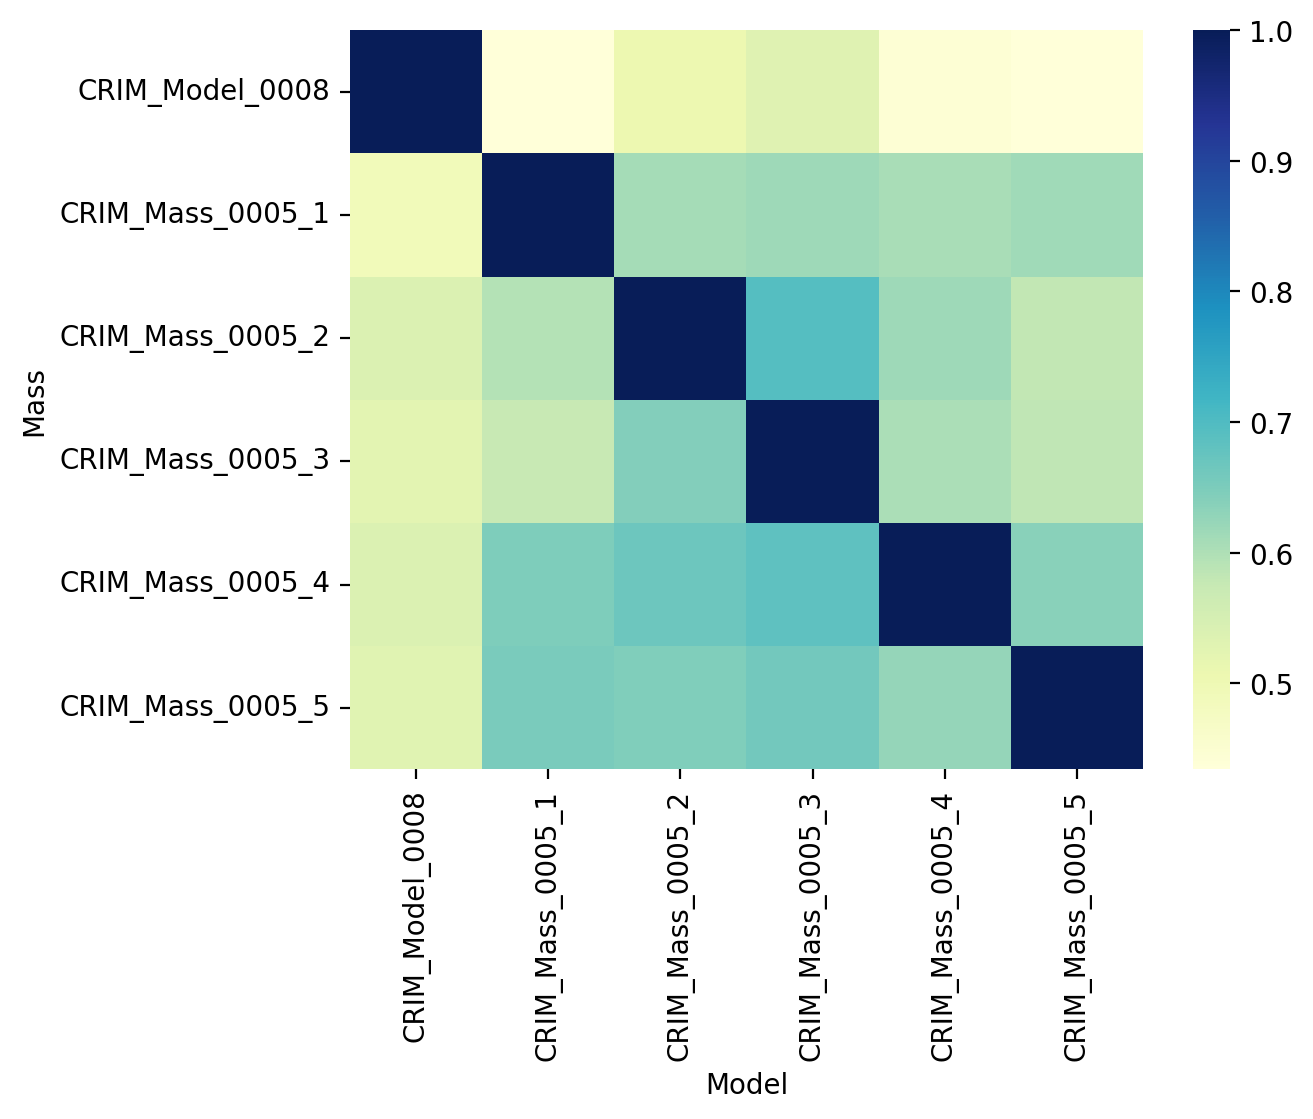

In [17]:
# module matrix

dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

### 1.7. Module Matrix with Separate Lists of Models and Masses

Define the lists above

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
cross_plot
```

In [19]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_cross_plot = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_cross_plot

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.710452,0.597458,0.557910
CRIM_Mass_0008_2,0.709622,0.602234,0.595361
CRIM_Mass_0008_3,0.701613,0.637097,0.618280
CRIM_Mass_0008_4,0.733333,0.669697,0.631818
CRIM_Mass_0008_5,0.798551,0.764130,0.757609
CRIM_Mass_0009_1,0.649306,0.576389,0.548611
CRIM_Mass_0009_2,0.634766,0.558594,0.523438
CRIM_Mass_0009_3,0.631356,0.574153,0.554025
CRIM_Mass_0009_4,0.636574,0.562500,0.527778


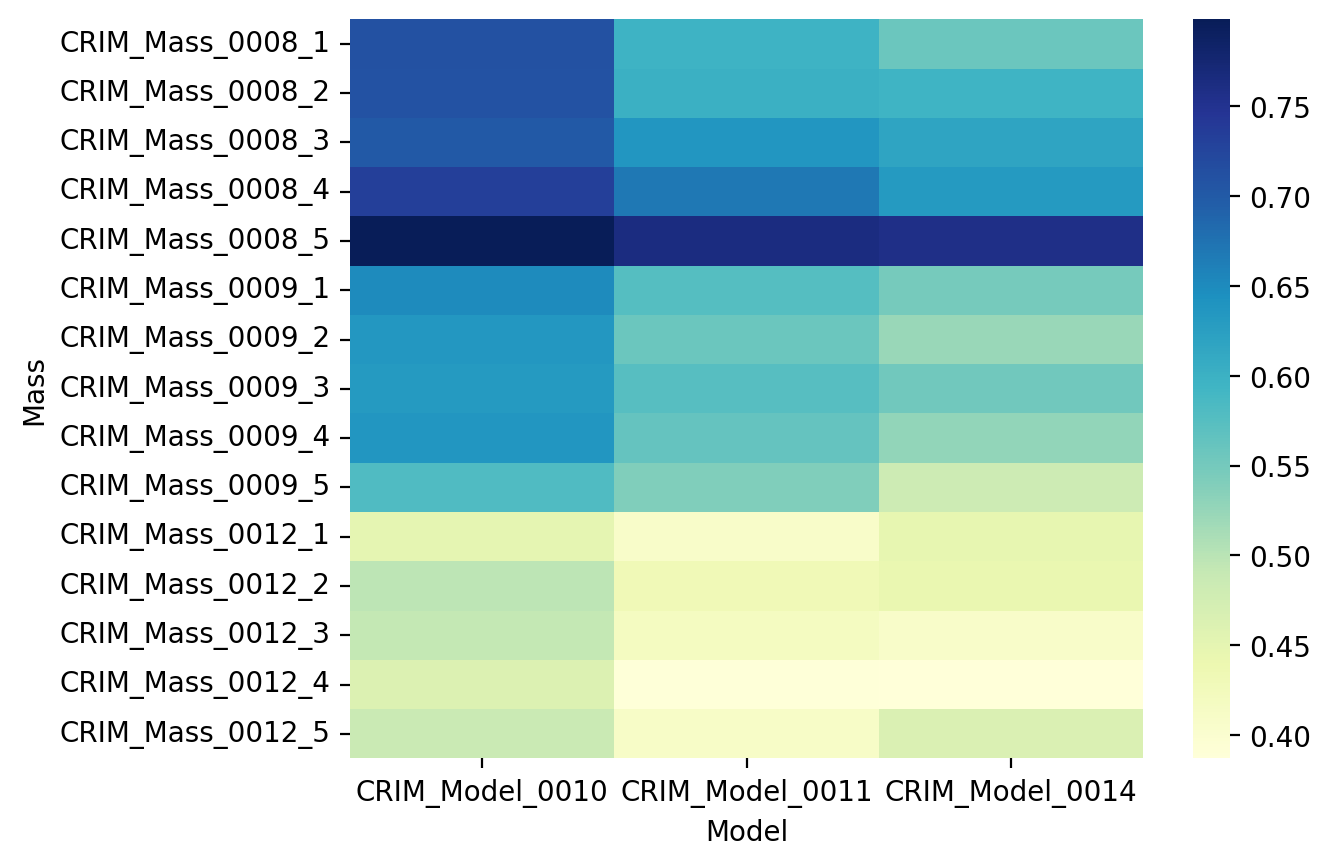

In [20]:
# melodic matrix
dataplot = sns.heatmap(module_cross_plot, cmap="YlGnBu", annot=False)
plt.show()

# Shared Entries (Micro Level)

#### Here we explore _where_ and _how_ the shared melodies are presented in each piece

* Load a specific pair of closely related pieces from your corpus
* Find exactly which melodic entries are shared
* Find out *where* these melodies occur in each piece
* Check the Fuga, PEN, and ID Presentation Types to see how the melodies are treated in each piece.  Pick one or two melodies (and Presentation Types) as examples to describe.

In [23]:
# Specify the Model
model = corpus_list[0] # <== the model will be score "0"
model = importScore(model)

# Specify the Mass Movement(s)
mass_movement = corpus_list[1] # <== select the index number of your mass from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

Previously imported piece detected.
Previously imported piece detected.
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'} {'title': 'Missa Ave Maria: Kyrie', 'composer': 'Antoine de Févin'}


### Get the Entries and Detailed Index for A Pair of Pieces


In [24]:
# for the model
model_entries = model.entries(thematic=True, anywhere=True, n=4)
# model_entries = model_entries.applymap(convertTuple)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)

# for the mass movement
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
# mass_movement_entries = mass_movement_entries.applymap(convertTuple)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=True, progress=True)

# check the detailed view as needed for each
# model_entries_det
# mass_movement_entries_det

#### Find the nGrams shared by your pieces

In [25]:

model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[1:]
shared_entries


[('2', '2', '2', '-2'),
 ('-2', '-2', '-2', '-2'),
 ('-3', '-2', '2', '2'),
 ('-2', '-2', '-2', '2')]

##  Make a Heatmap of Shared Entries in Two Pieces

* Let's look at **where** the shared melodies appear in each of your pieces.

* Judging only from the visualization, where do the shared melodies appear, and how similar does the treatment of them seem to be?

#### Note that you can also decide to compare one MASS movement with another MASS movement!

### Model Heatmap

In [467]:
## Use this for the Model Heatmap

nr = model.notes(combineUnisons=True) 
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = model.ngrams(df=mel, n=4)
entry_ngrams = model.entries(df=mel, n=4)
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])


alt.VConcatChart(...)

### Mass Movement Heatmap

In [468]:
## Use this for the Mass Movement Heatmap

nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])

alt.VConcatChart(...)

### Make the Short Lists of These Shared Ngrams and Their Offsets

In [471]:
# for the model
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries = model_offsets_of_shared_entries.unique()

# for the mass movement
mass_movement_short_list = mass_movement_entries_det[mass_movement_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_movement_offsets_of_shared_entries = mass_movement_short_list.index.get_level_values(2)
mass_movement_offsets_of_shared_entries = mass_movement_offsets_of_shared_entries.unique()



### Get Shared Entries as Presentation Types

* Note that not all shared entries will be used as Fuga, ID, and PEN but for those that appear in a pair of pieces, it can be informative to compare **how** they are treated!



In [475]:
# here we filter the PTypes to include ONLY those found in both the model and Mass movement

# here for the model
model_p_types = model.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)

model_shared_entry_ptypes = model_p_types[model_p_types.First_Offset.isin(model_offsets_of_shared_entries)]
model_ptypes = model_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])

# here for the Mass movement


mass_movement_p_types = mass_movement.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)


mass_movement_shared_entry_ptypes = mass_movement_p_types[mass_movement_p_types.First_Offset.isin(mass_movement_offsets_of_shared_entries)]
mass_movement_ptypes = mass_movement_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])
combined_ptypes = pd.concat([model_ptypes, mass_movement_ptypes])


### Now, Sort the Results so we see the Shared Melodies Together


In [476]:
combined_ptypes.sort_values('Soggetti')

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type
10,Josquin Des Prés,Ave Maria,948.0,"[111/3.0, 119/3.0]",[P1],"[(-2, -2, -2, -2)]",[64.0],"[Altus, Altus]",FUGA
1,Josquin Des Prés,Ave Maria,56.0,"[8/1.0, 10/1.0, 12/1.0, 14/1.0]","[P-8, P1, P-8]","[(-2, -2, -2, 2)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN
2,Antoine de Févin,Missa Ave Maria: Kyrie,170.0,"[22/2.0, 24/2.0]",[m-3],"[(-2, -2, -2, 2)]",[16.0],"[Altus, Tenor]",FUGA
4,Antoine de Févin,Missa Ave Maria: Kyrie,304.0,"[38/1.0, 42/1.0, 45/2.0, 50/4.0, 52/2.0, 56/4....","[P-8, P5, P-8, P8, P-8, P8, P1, P8]","[(-2, -2, -2, 2)]","[32.0, 26.0, 44.0, 12.0, 36.0, 4.0, 20.0, 4.0]","[Sup[erius], Tenor, Altus, Bassus, Altus, Bass...",FUGA
8,Antoine de Févin,Missa Ave Maria: Kyrie,702.0,"[86/4.0, 94/4.0]",[P8],"[(-2, -2, -2, 2)]",[64.0],"[Tenor, Sup[erius]]",FUGA
3,Josquin Des Prés,Ave Maria,244.0,"[31/3.0, 35/3.0]",[P-8],"[(2, 2, 2, -2)]",[32.0],"[[Superius], Tenor]",FUGA
12,Josquin Des Prés,Ave Maria,980.0,"[115/3.0, 123/3.0, 127/3.0, 129/3.0]","[P1, m7, P-8]","[(2, 2, 2, -2)]","[64.0, 32.0, 16.0]","[Altus, Altus, [Superius], Tenor]",FUGA
3,Antoine de Févin,Missa Ave Maria: Kyrie,228.0,"[29/3.0, 37/1.0, 41/1.0, 45/1.0, 46/3.0, 50/3....","[P4, P-8, P12, P-8, P1, P8, P-8]","[(2, 2, 2, -2)]","[68.0, 32.0, 32.0, 12.0, 32.0, 12.0, 12.0]","[Tenor, Altus, Bassus, Sup[erius], Bassus, Ten...",FUGA
0,Josquin Des Prés,Ave Maria,0.0,"[1/1.0, 3/1.0, 5/1.0, 7/1.0]","[P-8, P1, P-8]","[(4, 2, 2, -3)]","[16.0, 16.0, 16.0]","[[Superius], Altus, Tenor, Bassus]",PEN
1,Antoine de Févin,Missa Ave Maria: Kyrie,68.0,"[9/3.0, 12/1.0, 14/3.0, 17/1.0]","[P1, P8, P-8]","[(4, 2, 2, -3)]","[20.0, 20.0, 20.0]","[Tenor, Altus, Sup[erius], Tenor]",PEN
